# Capítulo 5: Mapas coropléticos

Con la unión lista, se construyen **mapas temáticos** (coropléticos) de la variable objetivo usando GeoPandas/Matplotlib.  
Se prueban distintos esquemas de clasificación (p. ej., `Quantiles`, `NaturalBreaks`) y paletas de color, y se añaden títulos y leyendas.

**Objetivo:** visualizar patrones territoriales de la variable seleccionada.  
**Entradas:** `data/union_departamentos.gpkg`.  
**Salidas:** figuras (opcionalmente guardadas en `figs/`) y mapas renderizados en el notebook.


Cargado: union_departamentos.gpkg | columnas: ['DPTO_CCDGO', 'DPTO_CNMBR', 'DIRECTORIO', 'geometry']
Faltantes en DIRECTORIO: 2


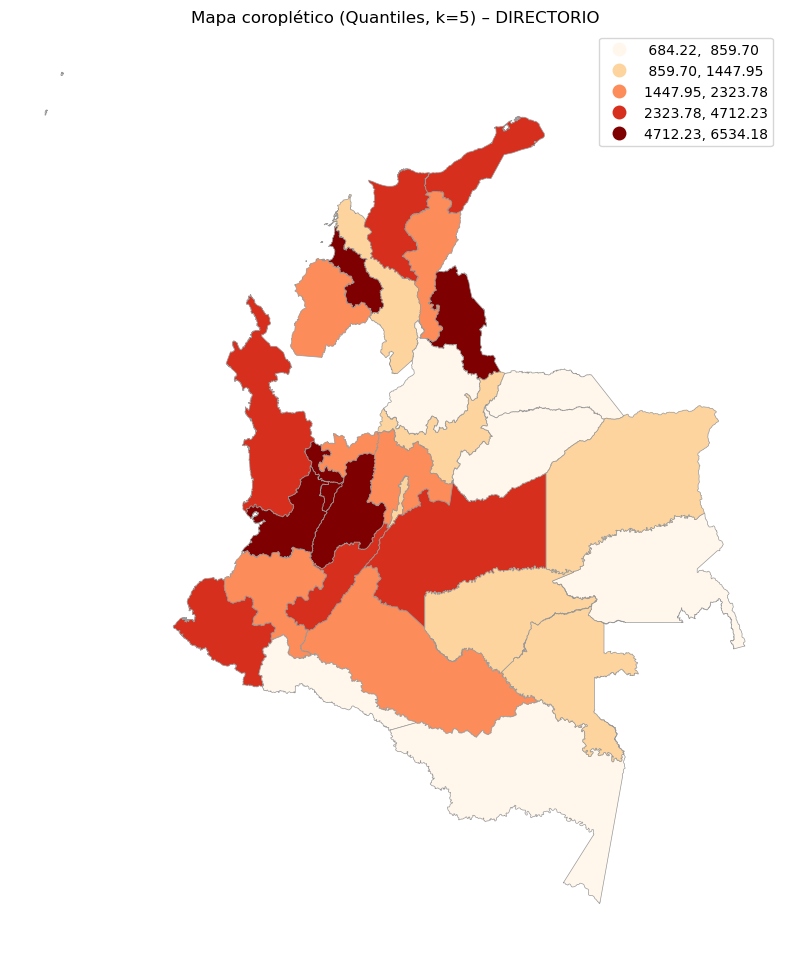

c:\Users\sergi\miniconda3\envs\geo_env\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\sergi\miniconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


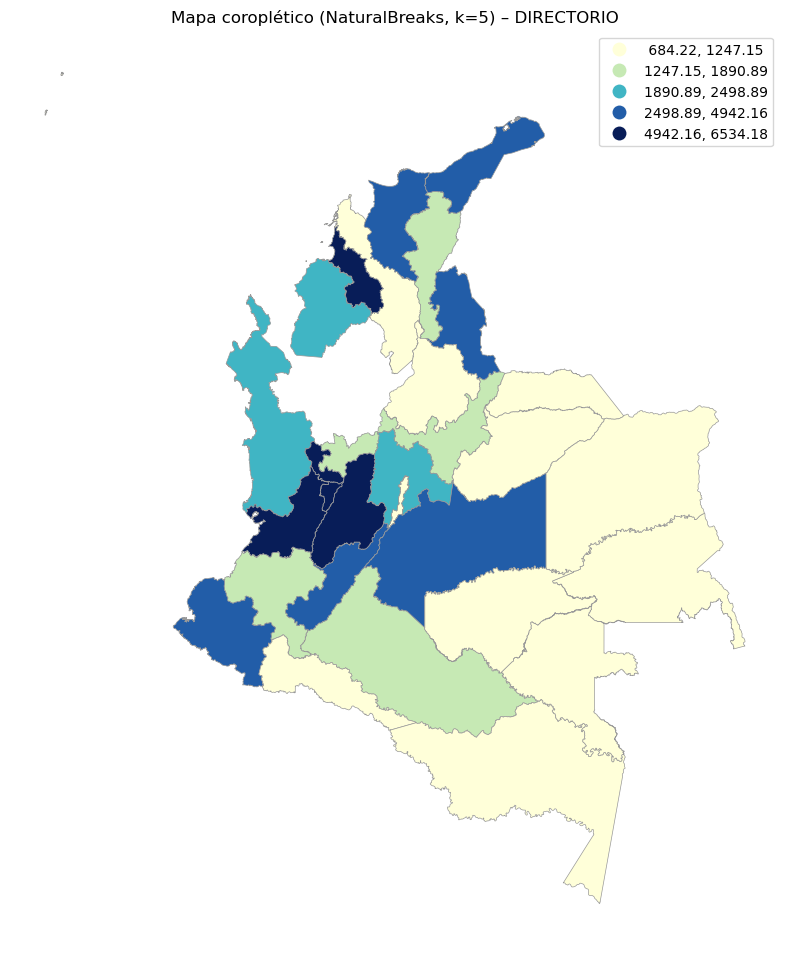

Guardados: ..\data\mapa_DIRECTORIO_quantiles.png y ..\data\mapa_DIRECTORIO_jenks.png


In [ ]:

import geopandas as gpd
import mapclassify as mc
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Cargar capa unida del Cap. 4
RUTA_GPKG = Path("..")/"data"/"union_departamentos.gpkg"
gdf = gpd.read_file(RUTA_GPKG, layer="union").to_crs(4326)
print("Cargado:", RUTA_GPKG.name, "| columnas:", list(gdf.columns))

# 2) Elige tu variable a mapear (la que quedó del Cap. 4)
VARIABLE = "DIRECTORIO"   # <-- si prefieres conteo, ver plan B abajo

# 3) Manejo simple de NA (se verán blancos si no rellenas)
faltantes = gdf[VARIABLE].isna().sum()
print(f"Faltantes en {VARIABLE}:", faltantes)

# 4) Mapa 1: Quantiles (k=5) + 'OrRd'
fig1, ax1 = plt.subplots(figsize=(8, 10))
gdf.plot(
    column=VARIABLE,
    scheme="Quantiles",
    k=5,
    cmap="OrRd",
    edgecolor="0.6",
    linewidth=0.5,
    legend=True,
    ax=ax1,
)
ax1.set_title(f"Mapa coroplético (Quantiles, k=5) – {VARIABLE}", fontsize=12)
ax1.axis("off")
fig1.tight_layout()
plt.show()

# 5) Mapa 2: NaturalBreaks (Jenks) (k=5) + 'YlGnBu'
fig2, ax2 = plt.subplots(figsize=(8, 10))
gdf.plot(
    column=VARIABLE,
    scheme="NaturalBreaks",
    k=5,
    cmap="YlGnBu",
    edgecolor="0.6",
    linewidth=0.5,
    legend=True,
    ax=ax2,
)
ax2.set_title(f"Mapa coroplético (NaturalBreaks, k=5) – {VARIABLE}", fontsize=12)
ax2.axis("off")
fig2.tight_layout()
plt.show()

# 6) (Opcional) Guardar imágenes
out1 = Path("..")/"data"/f"mapa_{VARIABLE}_quantiles.png"
out2 = Path("..")/"data"/f"mapa_{VARIABLE}_jenks.png"
fig1.savefig(out1, dpi=180)
fig2.savefig(out2, dpi=180)
print("Guardados:", out1, "y", out2)


## Comparación de mapas coropléticos por departamento

Se realizaron diferentes representaciones espaciales para la variable `DIRECTORIO` utilizando dos métodos de clasificación: **Quantiles (k=5)** y **Natural Breaks (k=5)**.  

---

### 1. Mapas con **Quantiles (k=5)**
- **Descripción:**  
  - La variable se divide en 5 clases con igual número de observaciones en cada rango.  
  - Colores: de beige (valores bajos) a rojo oscuro (valores altos).  

- **Interpretación:**  
  - Permite identificar contrastes relativos entre departamentos.  
  - Incluso pequeñas diferencias de valores se resaltan, ya que la división es estrictamente por número de observaciones.  
  - Departamentos en el centro y occidente (ej. Valle del Cauca, Antioquia, Cundinamarca) aparecen en los rangos más altos (rojo oscuro).  
  - Los departamentos de la Orinoquía y Amazonía tienden a estar en categorías más bajas (colores claros).  

- **Ventaja:** buena para comparación relativa.  
- **Desventaja:** puede exagerar diferencias cuando los datos están muy concentrados.  

---

### 2. Mapas con **Natural Breaks (Jenks, k=5)**
- **Descripción:**  
  - La clasificación agrupa los valores en clases que minimizan la variación interna y maximizan las diferencias entre grupos.  
  - Colores: de amarillo claro (valores bajos) a azul oscuro (valores altos).  

- **Interpretación:**  
  - Se ajusta mejor a la distribución real de los datos, mostrando “saltos naturales” en la variable.  
  - Se observa una concentración más clara de departamentos con valores altos en zonas específicas (Andina y Caribe).  
  - El contraste entre departamentos con valores medios y altos es más realista que en quantiles.  

- **Ventaja:** refleja mejor la estructura interna de los datos.  
- **Desventaja:** menos útil para comparar cuando se quiere que las clases tengan igual número de elementos.  

---

### Conclusión general
- Ambos métodos permiten analizar la distribución de la variable `DIRECTORIO` en el territorio nacional, pero desde perspectivas diferentes:  
  - **Quantiles:** resaltan diferencias relativas y permiten comparar departamentos entre sí de manera proporcional.  
  - **Natural Breaks:** enfatizan las discontinuidades reales de los datos y agrupan mejor departamentos con comportamientos similares.  

Para un **análisis exploratorio inicial**, los **quantiles** son útiles. Para un análisis **más interpretativo y realista**, conviene utilizar **Natural Breaks**.
